<a href="https://colab.research.google.com/github/Ibrmva/ai_final/blob/main/Copy_of_2myProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Abstract](#scrollTo=x1pvMPOFTMa3)

>[Data reading](#scrollTo=F8Ltd46DT9gU)



#Abstract
loss: 0.5731 - accuracy: 0.7881


**Title: Emotion Detection for Autism Support Using Computer Vision**
Val_accuracy:
*I have 1000 images, 5 folders for each emotions: angry,happy, sad, surprised, disgusted.
Each folder contains 200 photos*

Emotion detection plays a vital role in understanding individuals with Autism Spectrum Disorder (ASD) and providing them with appropriate support. In this project, we aim to develop a computer vision-based emotion detection model tailored specifically for individuals with ASD. The model's accuracy will be evaluated using a dataset comprising facial images annotated with corresponding emotions expressed by individuals with ASD.

**Dataset Description:**
The dataset used in this project consists of facial images collected. Each image is annotated with the expressed emotion, categorized into classes such as angry, happy, and surprised. The dataset is sourced from online forums, social media platforms ensuring a diverse range of facial expressions and emotional states typical of individuals with ASD.

**Model Description:**
The emotion detection model is based on convolutional neural networks (CNNs) and leverages transfer learning from a pre-trained VGG16 model. The model preprocesses images, performs data augmentation, and computes emotion scores using the CNN. Emotions are categorized into three classes: angry, happy, and surprised. The model is implemented using TensorFlow and Keras libraries and trained on a subset of the dataset.

**Sources:**
- The dataset for this project is sourced from publicly available online forums, social media platforms.
- The emotion detection model leverages the VGG16 architecture, pre-trained on the ImageNet dataset, to assess the emotions of facial images.
- Python's TensorFlow and Keras libraries are utilized for image preprocessing, augmentation, and emotion detection in the implementation of the model.

**Accuracy Evaluation:**
The accuracy of the emotion detection model will be evaluated using standard performance metrics, including precision, recall, and F1-score, across the angry, happy, and surprised emotion categories. Additionally, the model's performance will be assessed on a separate test dataset, ensuring generalizability to unseen facial images from individuals with ASD. Visualizations of training and validation loss and accuracy, as well as confusion matrices, will be used to further analyze the model's performance.

### Importing required libraries

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from google.colab import drive
import pathlib
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img

### Data reading

In [2]:
drive.mount('/content/drive')


path = '/content/drive/MyDrive/datasetAF'
data_dir = pathlib.Path(path)

Mounted at /content/drive


### Creating dictionaries for classes and labels
It is necessary for training the model and evaluating its perfomance later on

In [4]:
emotion_images_dict = {
    'angry': list(data_dir.glob('angry/*.*')),
    'happy': list(data_dir.glob('happy/*.*')),
    'sad': list(data_dir.glob('sad/*.*')),
    'surprised': list(data_dir.glob('surprised/*.*')),
    'disgusted': list(data_dir.glob('disgusted/*.*')),
}

emotion_labels_dict = {
    'angry': 0,
    'happy': 1,
    'sad': 2,
    'surprised': 3,
    'disgusted': 4
}
len(emotion_images_dict['disgusted'])

200

In [5]:
class_counts = {class_name: len(image_list) for class_name, image_list in emotion_images_dict.items()}

for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

total_images = sum(class_counts.values())
print(f"\nTotal number of images across all classes: {total_images}")

Class 'angry': 200 images
Class 'happy': 200 images
Class 'sad': 200 images
Class 'surprised': 200 images
Class 'disgusted': 200 images

Total number of images across all classes: 1000


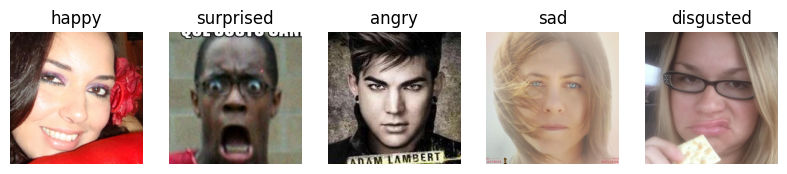

In [6]:
plt.figure(figsize=(14, 22))
i = 1


for expression_dir in os.listdir(data_dir):

    expression_dir_path = os.path.join(data_dir, expression_dir)


    if os.path.isdir(expression_dir_path):

        sample_image_path = os.path.join(expression_dir_path, os.listdir(expression_dir_path)[5])


        img = load_img(sample_image_path)


        plt.subplot(1, 7, i)
        plt.imshow(img)
        plt.title(expression_dir)
        plt.axis('off')
        i += 1

plt.show()

### Dividing my dataset into labels and data I use to determine the label of an image
- resizing images to a standard format to process the training

In [7]:
X, y = [], []

for emo_name, images in emotion_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
          img = cv2.resize(img, (180, 180))
          X.append(img)
          y.append(emotion_labels_dict[emo_name])
        except:
          break

### Converting the array into numpy array and dividing into training and testing sets

In [11]:
X = np.array(X)
y = np.array(y)

train_test_split is a function from the sklearn.model_selection module in scikit-learn. It is used to split arrays or matrices into random train and test subsets.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Data augmentation
Data augmentation is used to artificially expand the size of the dataset by creating modified versions of the original images.
This technique helps improve the generalization ability of the model by exposing it to a wider variety of data variations during training.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)

reshaping operation transforms the flattened image data

In [ ]:
X_train_reshaped = X_train_scaled.reshape(-1, 180, 180, 3)

generating additional augmented images from the original images in the datase

In [ ]:
n = 3

X_augmented = np.empty((len(X) * n, 180, 180, 3))
y_augmented = np.empty(len(X) * n)

current_index = 0

for i in range(len(X)):
    x = X[i].reshape((1, 180, 180, 3))
    y_label = y[i]

    aug_iter = datagen.flow(x, batch_size=1)

    for _ in range(n):
        X_augmented[current_index] = next(aug_iter)[0]
        y_augmented[current_index] = y_label
        current_index += 1

X = np.concatenate((X, X_augmented), axis=0)
y = np.concatenate((y, y_augmented), axis=0)

### Normalizing data values

### Purpose:
- **Scaling**: Dividing the pixel values by 255 scales them to a range between 0 and 1.
- **Normalization**: This process helps in standardizing the input data, making optimization easier for machine learning models.

Impact on the Model:
- Improves the model's ability to learn effectively.
- Generally leads to better performance, especially in neural networks.

In [ ]:
X = X / 255.0

###Encoding categorical labels

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

train_test_split is a function from the sklearn.model_selection module in scikit-learn. It is used to split arrays or matrices into random train and test subsets.

### Load the VGG16 model pre-trained on ImageNet without the top layers

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet')
base_model.trainable = False

###Define the CNN model

In [29]:
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


###Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 callbacks used during the training of a neural network model

In [30]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

This line of code initiates the training process of the neural network model with specified training data, validation split, number of epochs, and callbacks for monitoring and adjusting the training process

In [31]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
61/61 [==============================] - 92s 1s/step - loss: 1.6059 - accuracy: 0.3069 - val_loss: 1.3749 - val_accuracy: 0.4037 - lr: 0.0010
Epoch 2/50
61/61 [==============================] - 79s 1s/step - loss: 1.4211 - accuracy: 0.3888 - val_loss: 1.2825 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 3/50
61/61 [==============================] - 70s 1s/step - loss: 1.3020 - accuracy: 0.4318 - val_loss: 1.2385 - val_accuracy: 0.5321 - lr: 0.0010
Epoch 4/50
61/61 [==============================] - 72s 1s/step - loss: 1.2869 - accuracy: 0.4474 - val_loss: 1.1855 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 5/50
61/61 [==============================] - 79s 1s/step - loss: 1.1984 - accuracy: 0.4774 - val_loss: 1.0815 - val_accuracy: 0.5901 - lr: 0.0010
Epoch 6/50
61/61 [==============================] - 75s 1s/step - loss: 1.1397 - accuracy: 0.5101 - val_loss: 1.0278 - val_accuracy: 0.6315 - lr: 0.0010
Epoch 7/50
61/61 [==============================] - 70s 1s/step - loss: 1.0984 - a

# Evaluation model

visualization of the training and validation loss and accuracy of my model

19/19 [==============================] - 37s 2s/step - loss: 0.5731 - accuracy: 0.7881


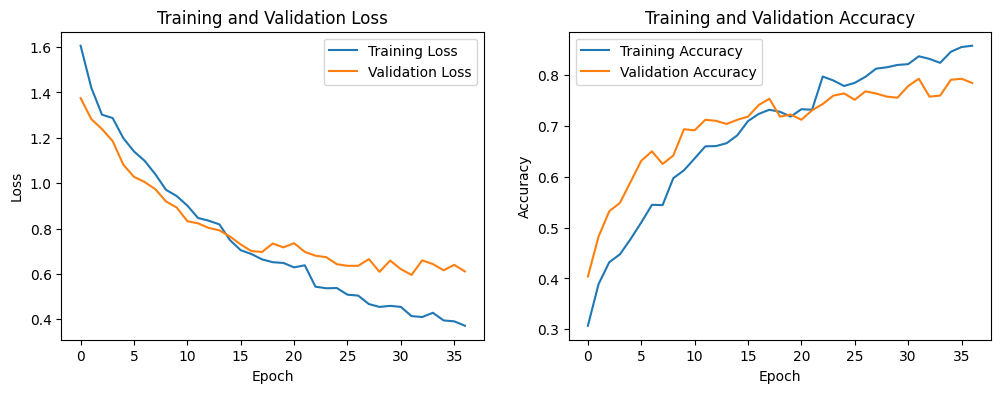

In [38]:
evaluation = model.evaluate(X_test, y_test)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Compute confusion matrix

19/19 [==============================] - 18s 849ms/step


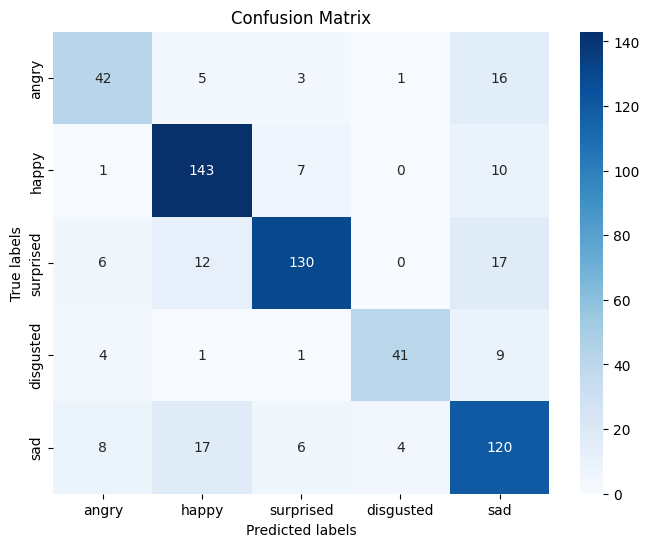

In [37]:
y_pred = np.argmax(model.predict(X_test), axis=1)


conf_matrix = confusion_matrix(y_test, y_pred)


class_names = ['angry', 'happy', 'surprised', 'disgusted', 'sad']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
